In [1]:
#import library
import pandas as pd
import numpy as np

In [2]:
#import data
df=pd.read_csv("hosing_dataset_to_toture.csv")

In [14]:
df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [15]:
df1= df.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [4]:
df.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [5]:
import matplotlib.pyplot as plt

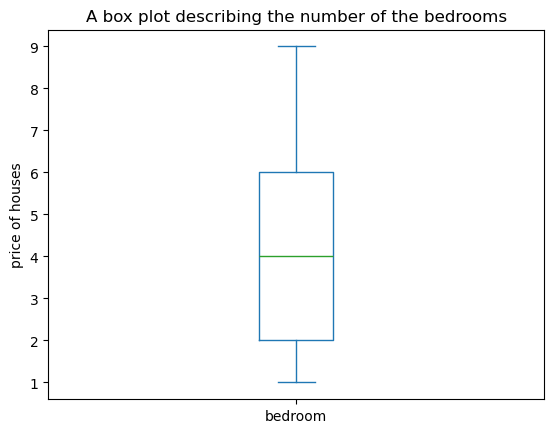

In [6]:
df["bedroom"].plot(kind="box")
plt.title("A box plot describing the number of the bedrooms")
plt.ylabel("price of houses")
plt.show()

<Axes: ylabel='Frequency'>

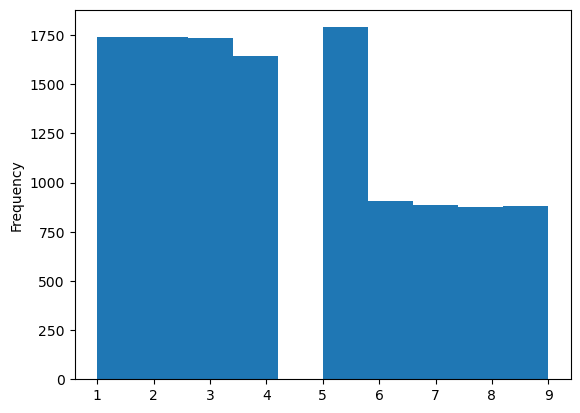

In [7]:
df.bedroom.plot(kind="hist")

In [8]:
df.bathroom.describe()

count    12195.000000
mean         3.134235
std          2.035950
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max          7.000000
Name: bathroom, dtype: float64

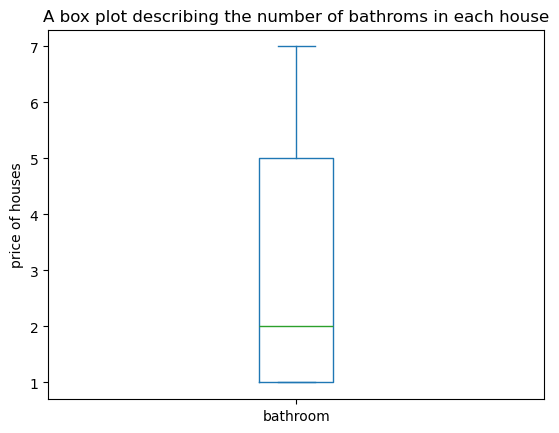

In [10]:
df.bathroom.plot(kind="box")
plt.title("A box plot describing the number of bathroms in each house")
plt.ylabel("price of houses")
plt.show()

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df.drop(columns=["ID"], inplace=True)

In [18]:
df.head()

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [19]:
#remove missing values
df['loc'].fillna(df['loc'].mode()[0], inplace=True)
df['title'].fillna(df['title'].mode()[0], inplace=True)
df['bedroom'].fillna(df['bedroom'].mean(), inplace=True)
df['bathroom'].fillna(df['bathroom'].mean(), inplace=True)
df['parking_space'].fillna(df['parking_space'].mean(), inplace=True)

In [20]:
df.isnull().sum()

loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [21]:
df.bedroom.corr(df.price)

0.4969128320418354

In [22]:
df.bathroom.corr(df.price)

0.20480440077725548

In [23]:
len(df)

14000

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
label_encoder = LabelEncoder()

In [80]:
df['loc_encoded'] = label_encoder.fit_transform(df['loc'])

In [81]:
df.head()

,loc,title,bedroom,bathroom,parking_space,price,loc_encoded
0,Katsina,Semi-detached duplex,2.000000,2.0,1.000000,1149999.565,19
1,Ondo,Apartment,4.308171,2.0,4.000000,1672416.689,27
2,Ekiti,Flat,7.000000,5.0,3.169825,3364799.814,12
3,Anambra,Detached duplex,5.000000,2.0,4.000000,2410306.756,3
4,Kogi,Terrace duplex,4.308171,5.0,6.000000,2600700.898,21


In [82]:
df.drop(columns=["loc"], inplace = True)

In [83]:
df.head()

,title,bedroom,bathroom,parking_space,price,loc_encoded
0,Semi-detached duplex,2.000000,2.0,1.000000,1149999.565,19
1,Apartment,4.308171,2.0,4.000000,1672416.689,27
2,Flat,7.000000,5.0,3.169825,3364799.814,12
3,Detached duplex,5.000000,2.0,4.000000,2410306.756,3
4,Terrace duplex,4.308171,5.0,6.000000,2600700.898,21


# split data into X and y

In [91]:
df.columns

Index(['title', 'bedroom', 'bathroom', 'parking_space', 'price',
       'loc_encoded'],
      dtype='object')

In [92]:
X = df[['loc_encoded', 'title', 'bedroom', 'bathroom', 'parking_space']]
y= df["price"]

In [ ]:
from sklearn.model_selection import train_test_split

# Train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=42, shuffle=2)

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [86]:
categorical_features = ["title"]

In [87]:
One_hot = OneHotEncoder()

In [88]:
transformer  = ColumnTransformer([("one_hot",
                                   One_hot, 
                                   categorical_features)], 
                                    remainder= "passthrough")    

In [93]:
X.head()

,loc_encoded,title,bedroom,bathroom,parking_space
0,19,Semi-detached duplex,2.000000,2.0,1.000000
1,27,Apartment,4.308171,2.0,4.000000
2,12,Flat,7.000000,5.0,3.169825
3,3,Detached duplex,5.000000,2.0,4.000000
4,21,Terrace duplex,4.308171,5.0,6.000000


In [94]:
transformed_X= transformer.fit_transform(X)

In [95]:
print(transformed_X)

[[0.         0.         0.         ... 2.         2.         1.        ]
 [1.         0.         0.         ... 4.30817146 2.         4.        ]
 [0.         0.         0.         ... 7.         5.         3.16982525]
 ...
 [0.         1.         0.         ... 8.         6.         5.        ]
 [0.         0.         0.         ... 4.30817146 6.         1.        ]
 [0.         0.         0.         ... 9.         7.         5.        ]]


In [96]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,2.000000,2.0,1.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,4.308171,2.0,4.000000
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0,7.000000,5.0,3.169825
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.000000,2.0,4.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21.0,4.308171,5.0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,4.308171,7.0,3.169825
13996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,4.308171,7.0,5.000000
13997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,8.000000,6.0,5.000000
13998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,4.308171,6.0,1.000000


# train_test_split with the transformed X

In [97]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, train_size=.80, random_state=42, shuffle=2)

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
model = RandomForestRegressor()

In [100]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
y_pred = model.predict(X_test)

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [104]:
mse=mean_squared_error(y_pred, y_test)

In [105]:
mse

423107703735.14355

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
lm = LinearRegression()

In [108]:
lm.fit(X_train, y_train)

LinearRegression()

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
y_pred = lm.predict(X_test)

In [111]:
mse=mean_squared_error(y_pred, y_test)

In [112]:
mse

608048597559.2476

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
dt = DecisionTreeRegressor()

In [115]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [116]:
y_pred = dt.predict(X_test)

In [117]:
mse=mean_squared_error(y_pred, y_test)

In [118]:
mse

664754100526.3491

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

In [121]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [122]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [123]:
y_pred = gb_model.predict(X_test)

In [124]:
mse=mean_squared_error(y_pred, y_test)

In [125]:
mse

414399860679.7272

In [126]:
from sklearn.linear_model import Ridge

In [127]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


Ridge()

In [128]:
y_pred = ridge_model.predict(X_test)

In [129]:
mse=mean_squared_error(y_pred, y_test)

In [130]:
mse

608048920997.6027

# This was done solely for comparison purpose.